<a href="https://colab.research.google.com/github/Anshugit109/CODSOFT/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1 TITANIC SURVIVAL PREDICTION

In [ ]:
### Importing the required module for prediction
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
## through module pandas reading the content of dataset
data=pd.read_csv("/content/Titanic-Dataset.csv",encoding='ISO-8859-1')

In [ ]:
data.shape ## this will show the shape of the dataset

(891, 12)

In [ ]:
# This will show the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
### for getting the type of data eg-int,float,object etc...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe() ### this shows the various parameters of dataset such as mean,standard deviation etc..

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isnull().sum() ##this will sum up the null values if any section having a NAN value or null value
# from this it is clearly visible that age section have 177 null values which means the age of 177 persons cannot be recognized, same is with the cabin section

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
### dropping unneccessary columns which we not need
##droping cabin bcz it is having too much missing values
data.drop("Cabin",axis=1,inplace=True)
print(data.columns)
## cabin column is removed

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [ ]:
# Age columns is also having a missing value therefore filling missing 'Age' with median value
data['Age']=data['Age'].fillna(data['Age'].median())
# Filling missing 'Embarked' with mode (most common value)
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#changing Sex column object data type into int so that we can do ml operations  further
mapping = {'male':1,'female':0}
data['Sex'] = data['Sex'].map(mapping)

In [ ]:
#changing Embarked column object data type into int so that we can do ml operations  further
mapping = {'C': 0, 'Q': 1, 'S': 2}
data['Embarked']=data['Embarked'].map(mapping)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


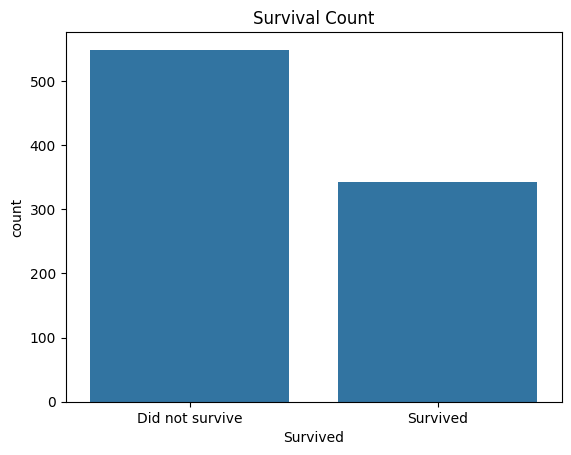

In [ ]:
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.show()

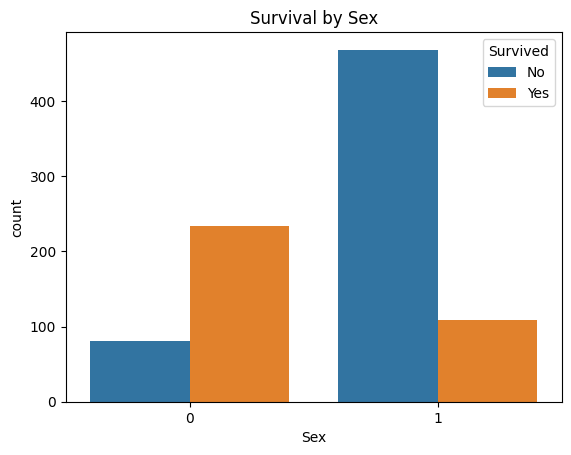

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Sex')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

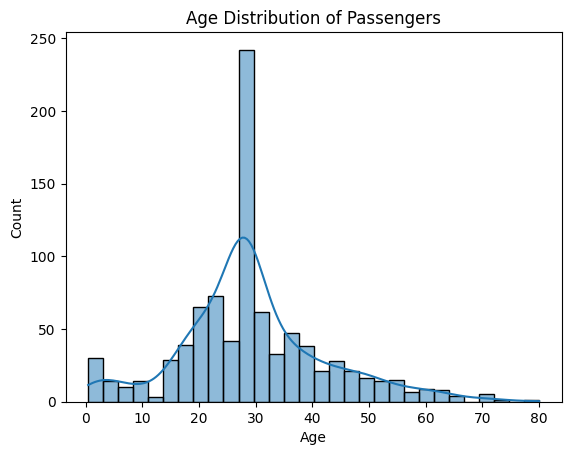

In [ ]:
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.show()

**NOW LET'S BUILD A ML MODEL**

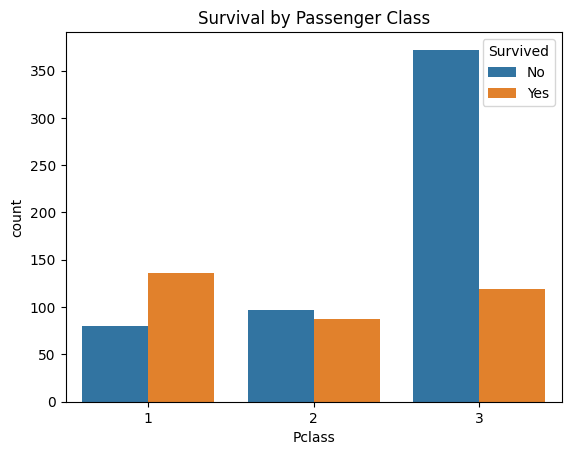

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [ ]:
X=data[['Pclass','Sex']]
Y=data['Survived']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [ ]:
predict=print(model.predict(X_test))

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [ ]:
print(Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [ ]:
import warnings
warnings.filterwarnings('ignore')
result=model.predict([[3,1]]) ## 1st parameter is for passenger class and 2nd parameter is for gender of the person.
## here we took a 3rd class passenger and 1 for male section
if result==1:
  print("The person is survived")
else:
  print("The person is not survived")


The person is not survived
